<a href="https://www.kaggle.com/code/nizarkarkar/wisdom-of-the-crowd-voting-bagging-boosting-stack?scriptVersionId=98697174" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


one of most powerfull techniques to obtain a model with good accuracy is the technique of wisdom of the crowd.In this notebook we will dive into this powerful techniques.So first of all what is the wisom of the crowd .
Wisdom of the crowd, the collective intelligence derived from responses of multiple human or machine individuals to the same questions, can be more accurate than each individual, and improve social decision-making and prediction accuracy.

https://media.sproutsocial.com/uploads/2019/05/Adapt-Wisdom-of-Social-Crowd-Featured-Image.svg

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd 
import seaborn as sns 

In [3]:
pd.set_option('display.max_column',21)

In [4]:
data=pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [5]:
df=data.copy()

In [6]:
df.shape

(21613, 21)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
df.dtypes.value_counts()

int64      15
float64     5
object      1
dtype: int64

In [10]:
df.isna().sum()/df.shape[0]

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [11]:
df=df.drop('id',axis=1)

In [12]:
df.shape

(21613, 20)

# Data visulization

<AxesSubplot:>

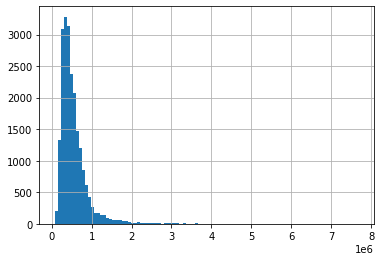

In [13]:
df['price'].hist(bins=100)

In [14]:
df['log_price']=np.log(df['price'])

In [15]:
df=df.drop('price',axis=1)

<AxesSubplot:>

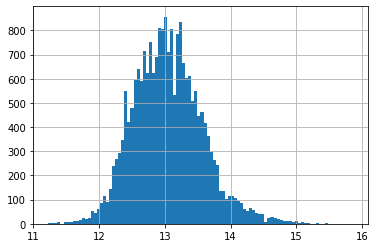

In [16]:
df['log_price'].hist(bins=100)

In [17]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

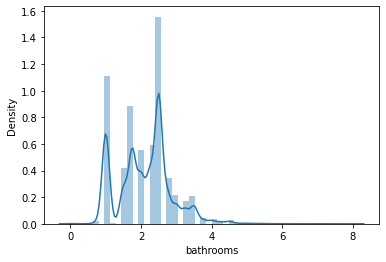

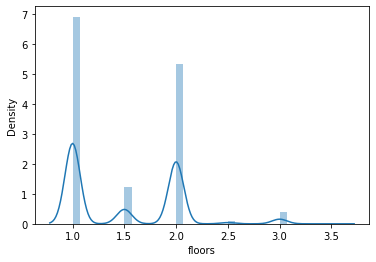

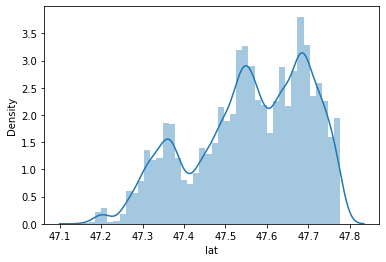

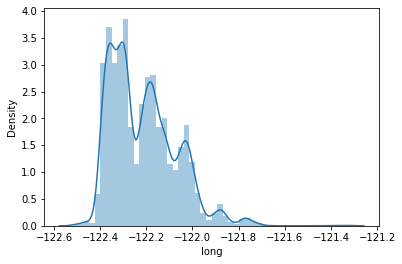

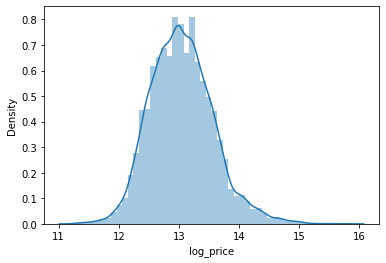

In [18]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

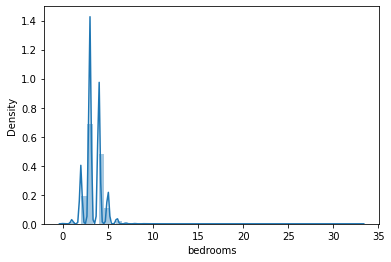

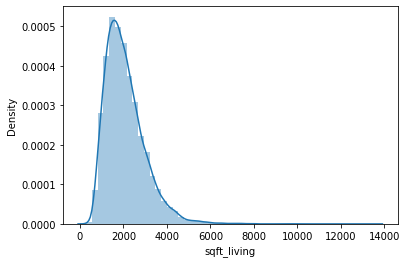

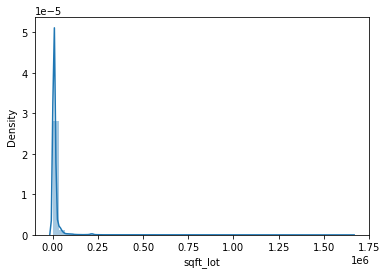

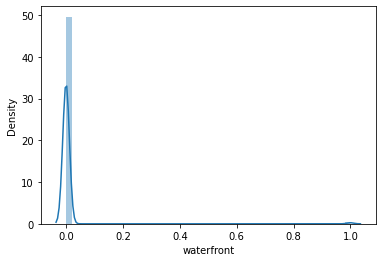

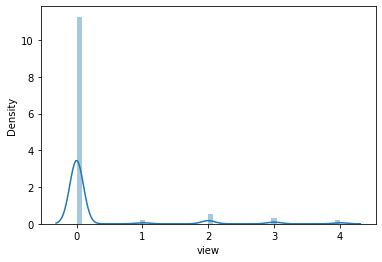

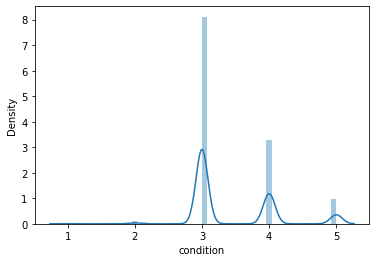

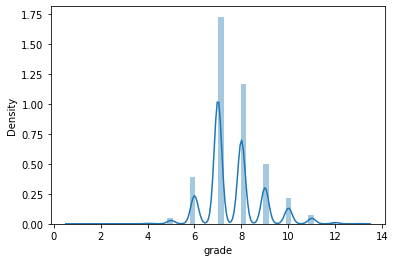

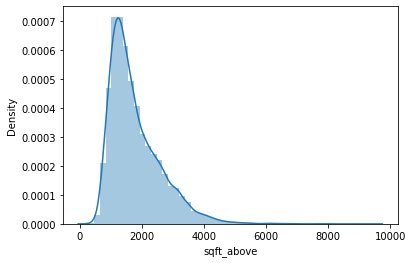

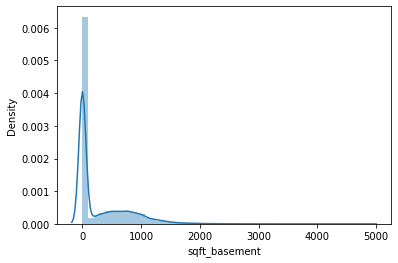

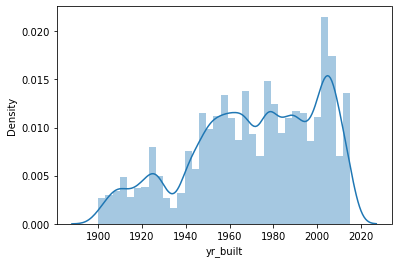

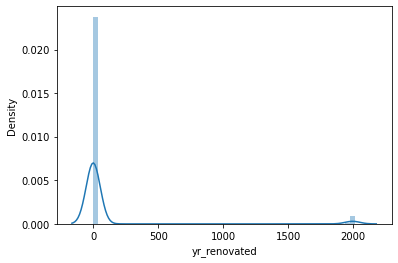

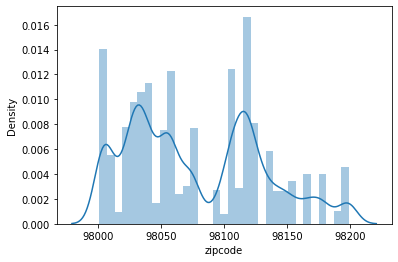

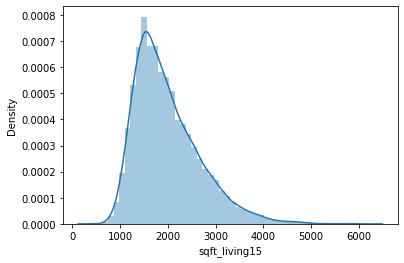

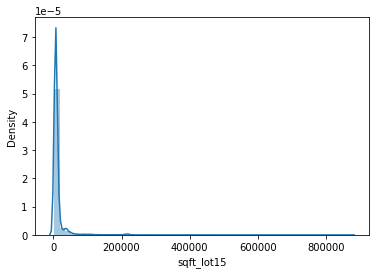

In [19]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

<AxesSubplot:>

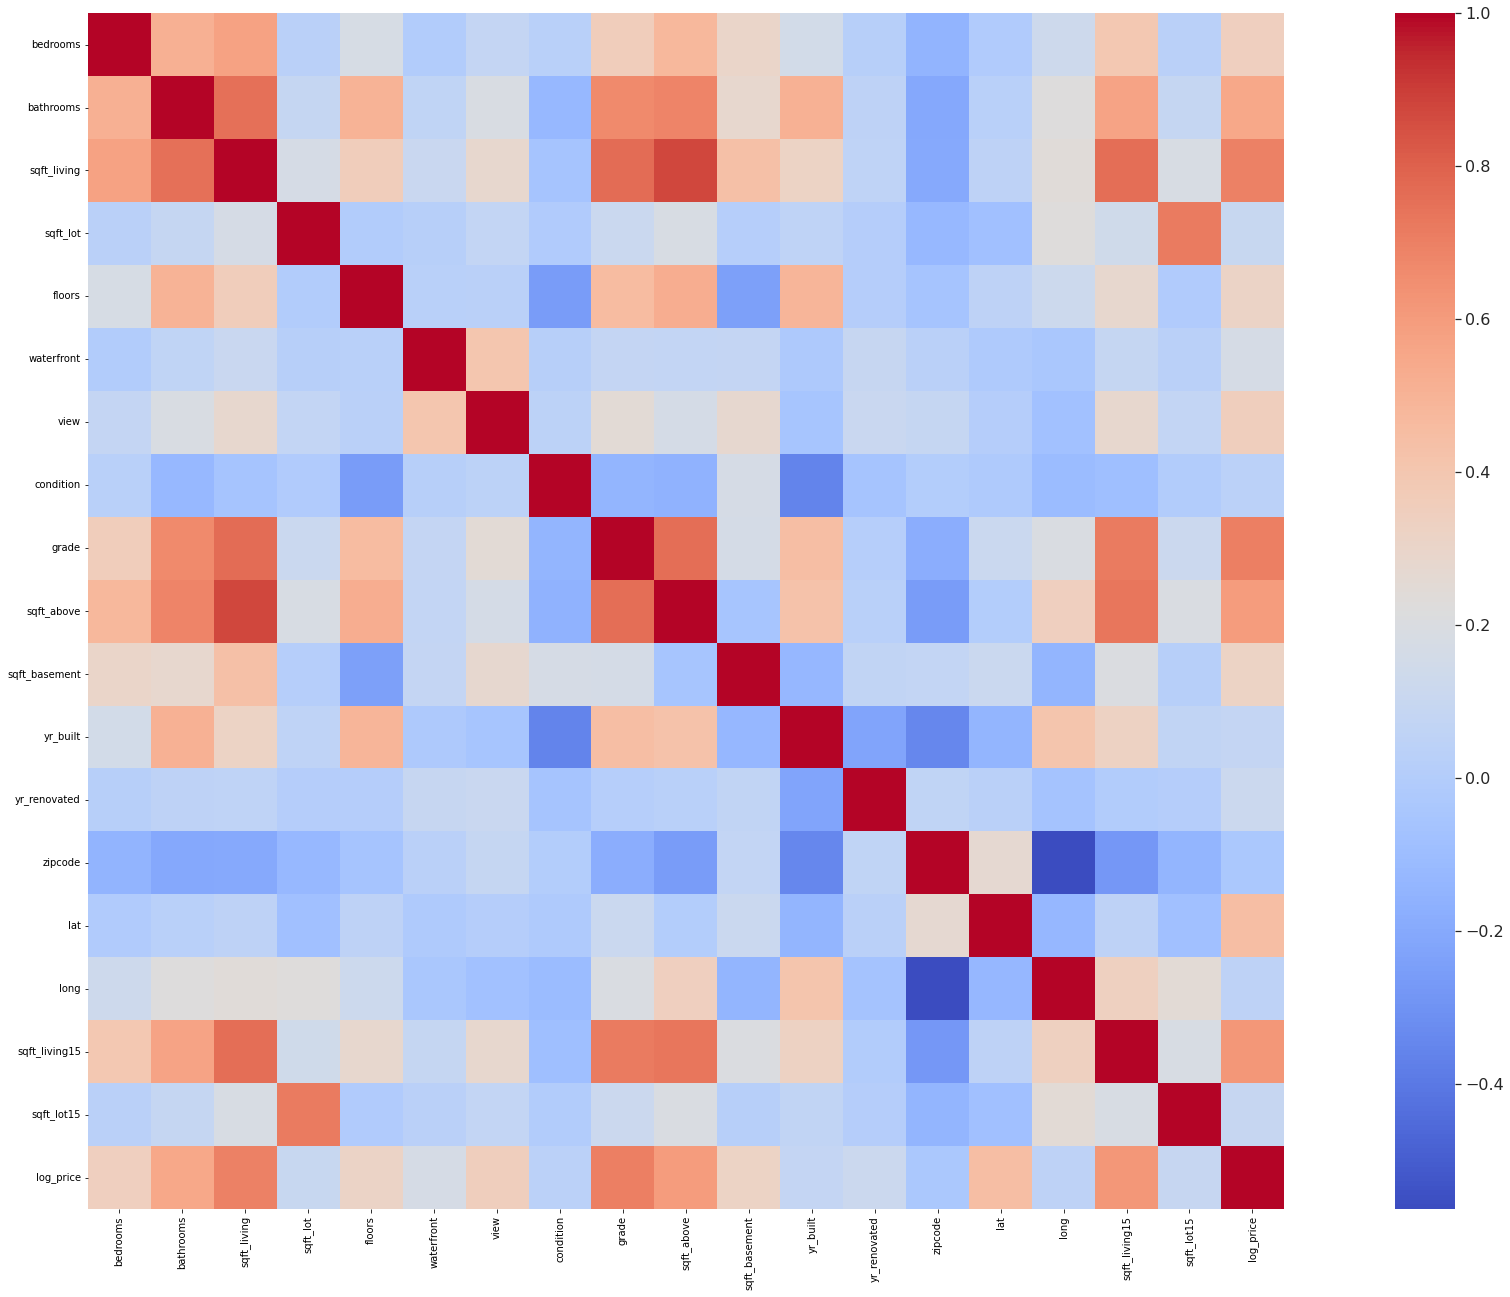

In [20]:
cormat=df.corr()
plt.subplots(figsize=(40,22))
sns.set(font_scale=1.45)
sns.heatmap(cormat,square=True,cmap='coolwarm')

the most corrolated features to the target 

In [21]:
corrolation=cormat['log_price'].sort_values(ascending=False)
features=corrolation.index[:10]
features

Index(['log_price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above',
       'bathrooms', 'lat', 'view', 'bedrooms', 'sqft_basement'],
      dtype='object')

In [22]:
cat= df.select_dtypes(include='object')

# preprocessing 

In [23]:
from category_encoders import CountEncoder
enc = CountEncoder(normalize=True, cols=cat.columns)
df = enc.fit_transform(df)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train,test=train_test_split(df,test_size=0.2,random_state=0)

In [26]:
X_train=train.drop('log_price',axis=1)
y_train=train['log_price']
X_test=test.drop('log_price',axis=1)
y_test=test['log_price']

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


# Voting regressor

the first technique in wisdom of the crowd in machine learning is voting.So what is voting and how it works??
since voting relies on the performance of many models, they will not be hindered by large errors or misclassifications from one model. A poor performance from one model can be offset by a strong performance from other models.

Voting works by combining models to make a prediction, you mitigate the risk of one model making an inaccurate prediction by having other models that can make the correct prediction. Such an approach enables the estimator to be more robust and prone to overfitting.

In [28]:
model_1=LinearRegression()
model_2=Lasso()
model_3=Ridge()
model_4=DecisionTreeRegressor(random_state=0)

model_5=VotingRegressor([('LinearRegeression',model_1),('Lasso',model_2),('Ridge',model_3),("DecisionTreeRegressor",model_4)])

In [29]:
for model in (model_1,model_2,model_3,model_4,model_5):
    model.fit(X_train,y_train)
    print(model.__class__.__name__,model.score(X_test,y_test))

LinearRegression 0.7710145060089688
Lasso 0.5308692549655164
Ridge 0.7710121078413806
DecisionTreeRegressor 0.772186648420127
VotingRegressor 0.8063244661982855


As we can see the VotingRegressor gave us the best result comparing to other models that we have tried 


# Bagging 

Another technique in wisdom of the crowd is Bagging .

Bagging, also known as Bootstrap aggregating, is an ensemble learning technique that helps to improve the performance and accuracy of machine learning algorithms. It is used to deal with bias-variance trade-offs and reduces the variance of a prediction model. Bagging avoids overfitting of data and is used for both regression and classification models, specifically for decision tree algorithms.



https://www.simplilearn.com/ice9/free_resources_article_thumb/Bagging.PNG

In [30]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

In [31]:
 model= BaggingRegressor(base_estimator=RandomForestRegressor(),
                         n_estimators=100,random_state=0)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8904755048607516

# Boosting 

Let's talk now about Boosting .
Introduction
Lots of analyst misinterpret the term ‘boosting’ used in data science. Let me provide an interesting explanation of this term. Boosting grants power to machine learning models to improve their accuracy of prediction.

Boosting algorithms are one of the most widely used algorithm in data science competitions. 

Let me give you an exemple of how boosting works.Imagine that you and your friends decided to work on a project but every one of you have a wickness in some tasks but in contrary the other is capable to do these tasks perfectly if you cooperate together the result will be excellent . this is exactually how boosting works 


In [32]:
from sklearn.ensemble import AdaBoostRegressor ,GradientBoostingRegressor

In [33]:
model=AdaBoostRegressor(n_estimators=100)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7737538150285574

# Stacking 

Stacking is a way to ensemble multiple classifications or regression model. There are many ways to ensemble models, the widely known models are Bagging or Boosting. Bagging allows multiple similar models with high variance are averaged to decrease variance. Boosting builds multiple incremental models to decrease the bias, while keeping variance small

https://media.geeksforgeeks.org/wp-content/uploads/20190515104518/stacking.png

In [34]:
from sklearn.ensemble import StackingRegressor

In [35]:
model_4=StackingRegressor([('LinearRegeression',model_1),('Lasso',model_2),('Ridge',model_3),("DecisionTreeRegressor",model_4)],final_estimator=RandomForestRegressor(n_estimators=100,
                                          random_state=0))
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7706023748160196